# Wiederholung: Größtfehler, oder lineare Fehlerfortpflanzung

Formel:

$\Delta F(X_1, X_2, ...) = | \frac{\partial F}{\partial X_1 } \cdot \Delta X_1 | + | \frac{\partial F}{\partial X_2 } \cdot \Delta X_2 | + |...|
$

## Beispiel: Strommessung mit Messwiderstand

Strom $I$ wird aus fehlerbehafteten Größen $U$ und $R$ berechnet

$I(U,R)=\frac{U}{R}$

$\Delta I = | \frac{\partial I}{\partial U } \cdot \Delta U | + | \frac{\partial I}{\partial R } \cdot \Delta R | 
$

Partielle Ableitungen bilden:

$\frac{\partial I}{\partial U } = \frac{1}{R}$

$\frac{\partial I}{\partial R } = -\frac{U}{{{R}^{2}}}$

Angenommene Werte und Maximalfehler:

$R  = 10.0 \mathrm{\Omega}$

$U  = 1 \mathrm{V}$

$\Delta R  = \pm 0.1 \mathrm{\Omega}$

$\Delta U  = \pm 0.01 \mathrm{V}$

Einsetzen und $\Delta I $ bestimmen:

$\Delta I = 2 \mathrm{mA}$

### Grafische Darstellung

Die Funktion wird mit der Formel in einem Punkt $I(U,R)$ linearisiert (vorstellbar als eine Ebene).
Es entspricht einer Taylor-Reihenenticklung, die nach dem ersten Schritt abgebrochen wird.

Der berechnete Größtfehler ist nur dann eine exakte Lösung, wenn alle höheren Ableitungen = 0 sind.
Ansonsten gibt der Größtfehler nur näherungsweise die Lösung an.

<IPython.core.display.Javascript object>


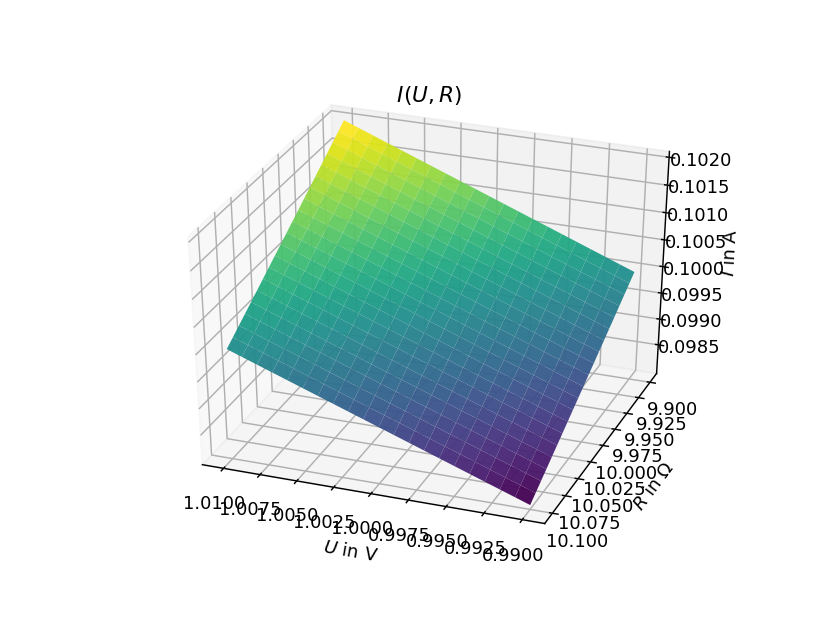

Text(0.5, 0.92, ' $I(U,R)$')

In [12]:
import sys
!{sys.executable} -m pip install numpy matplotlib seaborn > /dev/null
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.rcParams['figure.dpi'] = 130

def solve_I(U, R):
	return U/R

R_real = 10.0 # Ohm
U_real = 1.0 # V

I_real = solve_I(U_real, R_real)

U_delta = 0.01 # V +/- accuracy
R_delta = 0.1 # Ohm

n_step = 21
steps = np.linspace(-1, 1, n_step)
U = steps*U_delta + U_real
R = steps*R_delta + R_real
U, R = np.meshgrid(U, R)
I = solve_I(U, R)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(U, R, I, cmap=plt.cm.viridis, linewidth=0, antialiased=True,alpha=0.95)

ax.set_xlabel("$U$ in V")
ax.set_ylabel("$R$ in $\Omega$")
ax.set_zlabel("$I$ in A")
ax.set_title(r" $I(U,R)$")



<IPython.core.display.Javascript object>


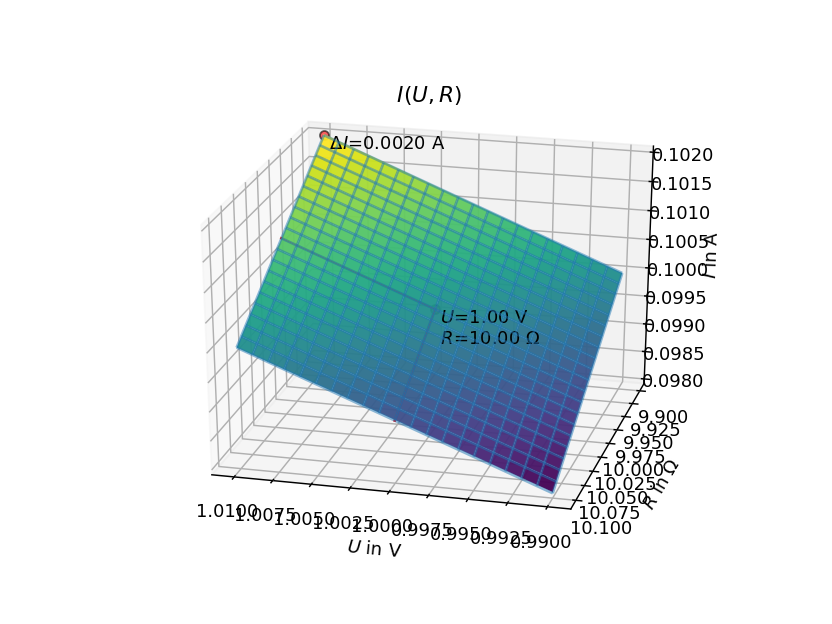

In [13]:
def solve_diff_U(U, R):	
	return 1/R

def solve_diff_R(U, R):
	return -U/R**2


steps_U, steps_R = np.meshgrid(steps*U_delta, steps*R_delta)
linearized_I = solve_diff_U(U_real, R_real)*steps_U + solve_diff_R(U_real, R_real) * steps_R + I_real

surf = ax.plot_wireframe(U, R, linearized_I, alpha=0.5) #, linewidth=0), color="r")

ax.plot([U_real], [R_real], [I_real], markerfacecolor='r', markeredgecolor='k', marker='o', markersize=5, alpha=0.6)
ax.text(U_real, R_real, I_real, " $U$=%.2f V\n $R$=%.2f $\Omega$"%(U_real, R_real), fontsize=10, va='top')

ax.plot(np.array([0,U_delta])+U_real, [R_real, R_real], [I_real, linearized_I[int(n_step/2), n_step-1]], color='r')
ax.plot([U_real, U_real], np.array([0,R_delta])+R_real, [I_real, linearized_I[n_step-1, int(n_step/2)]], color='r')

ax.plot([U_real+U_delta], [R_real-R_delta], [linearized_I[0,-1]], markerfacecolor='r', markeredgecolor='k', marker='o', markersize=5, alpha=0.6)
ax.text(U_real+U_delta, R_real-R_delta, linearized_I[0,-1], " $\Delta I$=%.4f A"%(linearized_I[0,-1]-I_real), fontsize=10, va='top')
fig

## Beispiel 2: Belasteter Spannungsteiler


Die Widerstände $R_a$ und $R_c$ sind genau bekannt. Mit gemessener Spannung $U_b$ und U wird $R_b$ bestimmt:

$\frac{U}{{{U}_{b}}}=\frac{\left( {{R}_{b}}+{{R}_{a}}\right) \left( {{R}_{c}}+\frac{{{R}_{a}}{{R}_{b}}}{{{R}_{b}}+{{R}_{a}}}\right) }{{{R}_{a}}{{R}_{b}}}$

Umgeformt nach $R_b$:

${{R}_{b}}(U, U_b)= -\frac{{{R}_{a}}{{R}_{c}}{{U}_{b}}}{\left( {{R}_{c}}+{{R}_{a}}\right) {{U}_{b}}-{{R}_{a}}U}$

Es ist der maximale Fehler für $R_b$ gesucht, wenn beide gemessene Spannungen als fehlerbehaftet angenommen werden:

$\Delta U_b  = \pm 0.05 \mathrm{V}$

$\Delta U  = \pm 0.05 \mathrm{V}$

Partielle Ableitungen bilden:

$\frac{\partial R_b}{\partial U_b } = \frac{{{R}_{a}}{{R}_{c}}\left( {{R}_{c}}+{{R}_{a}}\right) {{U}_{b}}}{{{\left( \left( {{R}_{c}}+{{R}_{a}}\right) {{U}_{b}}-{{R}_{a}}U\right) }^{2}}}-\frac{{{R}_{a}}{{R}_{c}}}{\left( {{R}_{c}}+{{R}_{a}}\right) {{U}_{b}}-{{R}_{a}}U}$

$\frac{\partial R_b}{\partial U } = -\frac{{{{{R}_{a}}}^{2}}{{R}_{c}}{{U}_{b}}}{{{\left( \left( {{R}_{c}}+{{R}_{a}}\right) {{U}_{b}}-{{R}_{a}}U\right) }^{2}}}$

$\Delta R_b = | \frac{\partial R_b}{\partial U } \cdot \Delta U | + | \frac{\partial R_b}{\partial U_b } \cdot \Delta U_b | $


### Grafische Darstellung

<IPython.core.display.Javascript object>


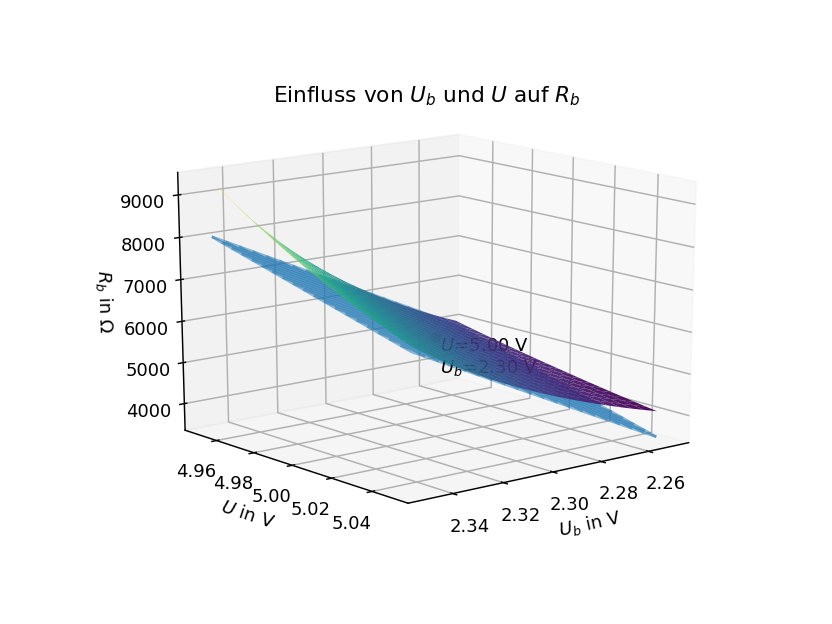

lin. Error for R_b: +/- 2281.250000 Ohm
real Error for R_b: + 3650.000000, - 1659.090909 Ohm


In [14]:
def example2():
	def solve_R_b(U, U_b):
		return - ((R_a*R_c*U_b)/((R_c+R_a)*U_b-R_a*U))

	def solve_diff_U_b(U, U_b):	
		return (R_a*R_c*(R_c+R_a)*U_b)/((R_c+R_a)*U_b-R_a*U)**2-(R_a*R_c)/((R_c+R_a)*U_b-R_a*U)

	def solve_diff_U(U, U_b):
		return -(R_a**2*R_c*U_b)/((R_c+R_a)*U_b-R_a*U)**2

	R_a = 1000.0 # Ohm
	R_c = 1000.0 # Ohm
	U_real = 5.0 # V
	U_b_real = 2.3 # V
	R_b_real = solve_R_b(U_real, U_b_real)

	U_delta = 0.05 # V +/- accuracy

	steps = np.linspace(-U_delta, U_delta, 20)
	U = steps + U_real
	U_b = steps + U_b_real
	U, U_b = np.meshgrid(U, U_b)
	R_b = solve_R_b(U, U_b)
	fig = plt.figure()
	ax = fig.gca(projection='3d')
	surf = ax.plot_surface(U_b, U, R_b, cmap=plt.cm.viridis, linewidth=0, antialiased=True,alpha=0.95)

	ax.plot([U_b_real], [U_real], [R_b_real], markerfacecolor='r', markeredgecolor='k', marker='o', markersize=5, alpha=0.6)

	steps_U, steps_U_b = np.meshgrid(steps, steps)
	linearized_R_b = solve_diff_U_b(U_real, U_b_real)*steps_U_b + solve_diff_U(U_real, U_b_real) * steps_U + R_b_real
   
	surf = ax.plot_wireframe(U_b, U, linearized_R_b, alpha=0.5) #, linewidth=0), color="r")
	ax.text(U_b_real, U_real, R_b_real, " $U$=%.2f V\n $U_b$=%.2f V"%(U_real, U_b_real), fontsize=10, va='top')
	ax.set_xlabel("$U_b$ in V")
	ax.set_ylabel("$U$ in V")
	ax.set_zlabel("$R_b$ in $\Omega$")
	ax.set_title(r"Einfluss von $U_b$ und $U$ auf $R_b$")

	delta_R_b = abs(solve_diff_U_b(U_real, U_b_real)*U_delta) + abs(solve_diff_U(U_real, U_b_real) * U_delta)
	print("lin. Error for R_b: +/- %f Ohm"%(delta_R_b))
	print("real Error for R_b: + %f, - %f Ohm"%(np.max(R_b)-R_b_real, R_b_real - np.min(R_b)))
    

example2()